In [ ]:
## Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aqi files/airqmonitoring.csv',encoding='ISO-8859-1')
# Reading the dataset

## Data Understanding

In [ ]:
df.head()
# Loading the dataset

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [ ]:
df.shape
# As we can see that there are 4,35,742 rows and 13 columns in the dataset

(435742, 13)

In [ ]:
df.info()
# Checking the over all information on the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [ ]:
df.isnull().sum()
# There are a lot of missing values present in the dataset

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [ ]:
df.describe()
# Checking the descriptive stats of the numeric values present in the data like mean, standard deviation, min values and max value present in the data

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [ ]:
df.nunique()
# These are all the unique values present in the dataframe

stn_code                        803
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

In [ ]:
df.columns
# These are all the columns present in the dataset.

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

stn_code (station code)
sampling_date (date of sample collection)
state (Indian State)
location (location of sample collection)
agency
type (type of area)
so2 (sulphur dioxide concentration)
no2 (nitrogen dioxide concentration)
rspm (respirable suspended particualte matter concentration)
spm (suspended particulate matter)
location_monitoring_station
pm2_5 (particulate matter 2.5)
date (date)

## Data Visualization

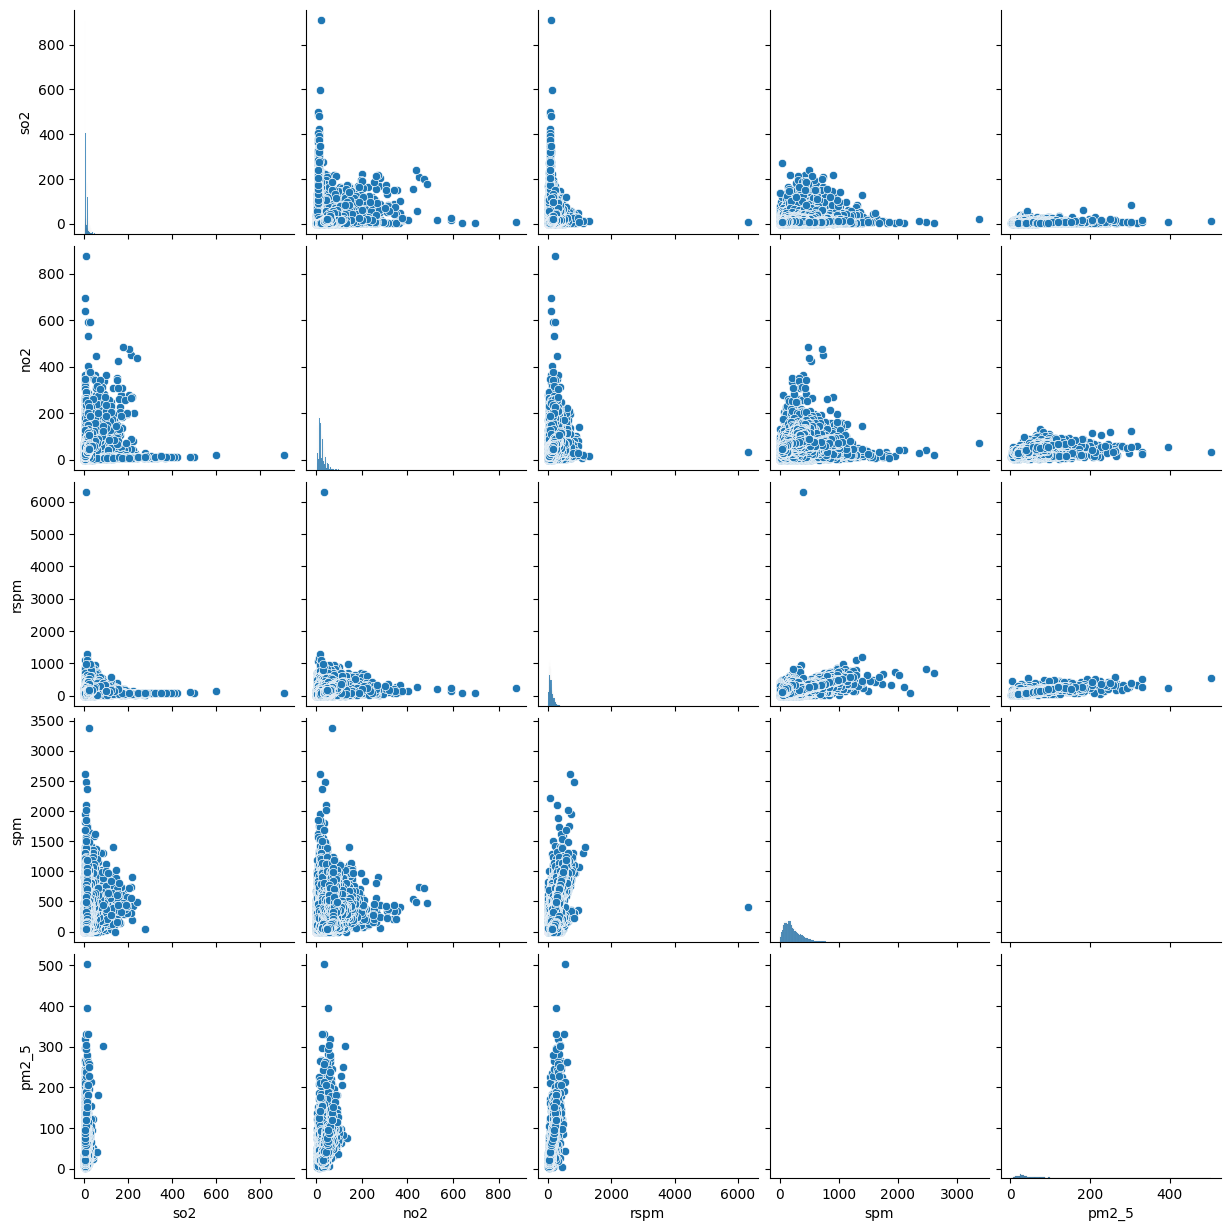

In [ ]:
sns.pairplot(data=df)

In [ ]:
df['state'].value_counts()
# Viewing the count of values present in the state column

state
Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     

[]

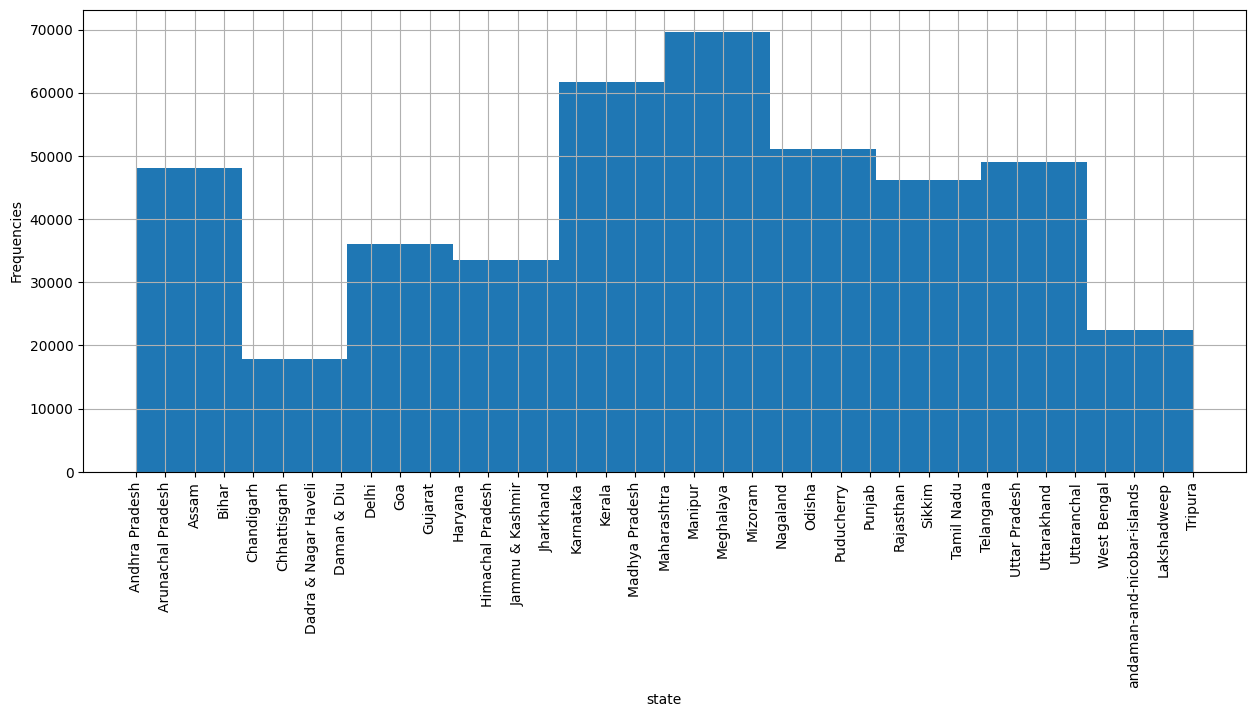

In [ ]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.state.hist()
plt.xlabel('state')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of states present in the dataset.

In [ ]:
df['type'].value_counts()
# Viewing the count of values present in the type column

type
Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: count, dtype: int64

[]

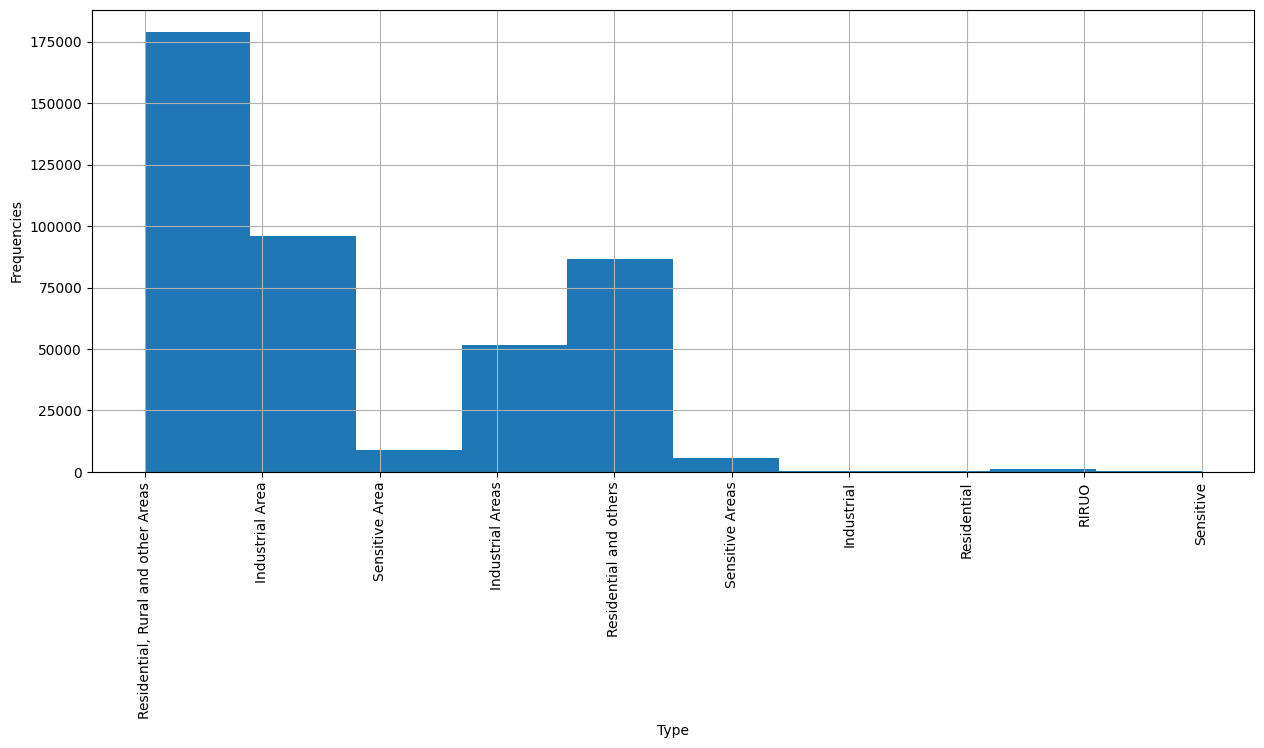

In [ ]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.type.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of Types present in the dataset.

In [ ]:
df['agency'].value_counts()
# Viewing the counts of values present in the agency column

agency
Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         82
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         53
Name: count, Length: 64, dtype: int64

[]

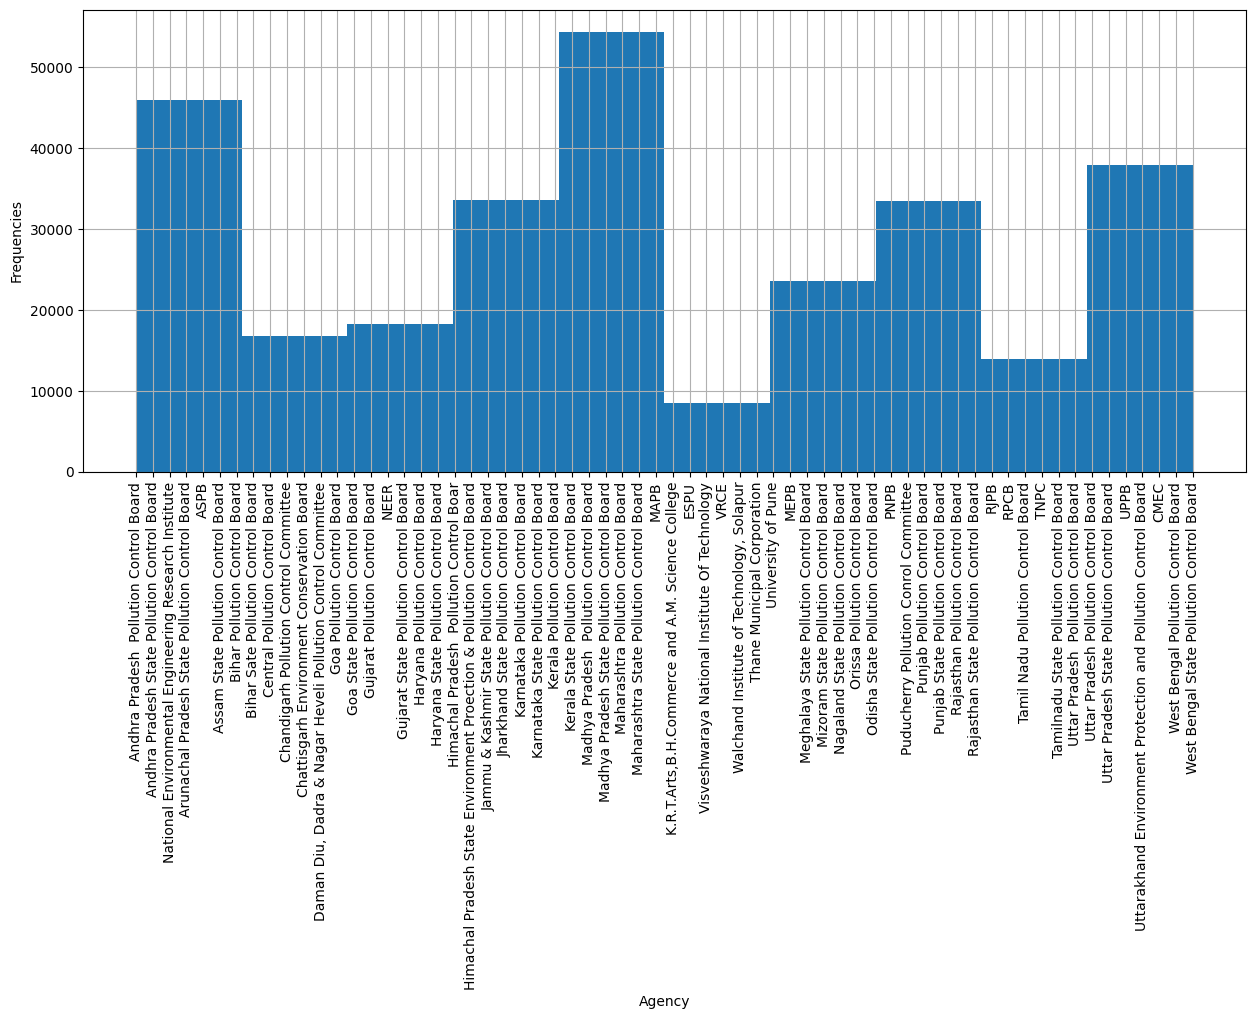

In [ ]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.agency.hist()
plt.xlabel('Agency')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of Agency present in the dataset.

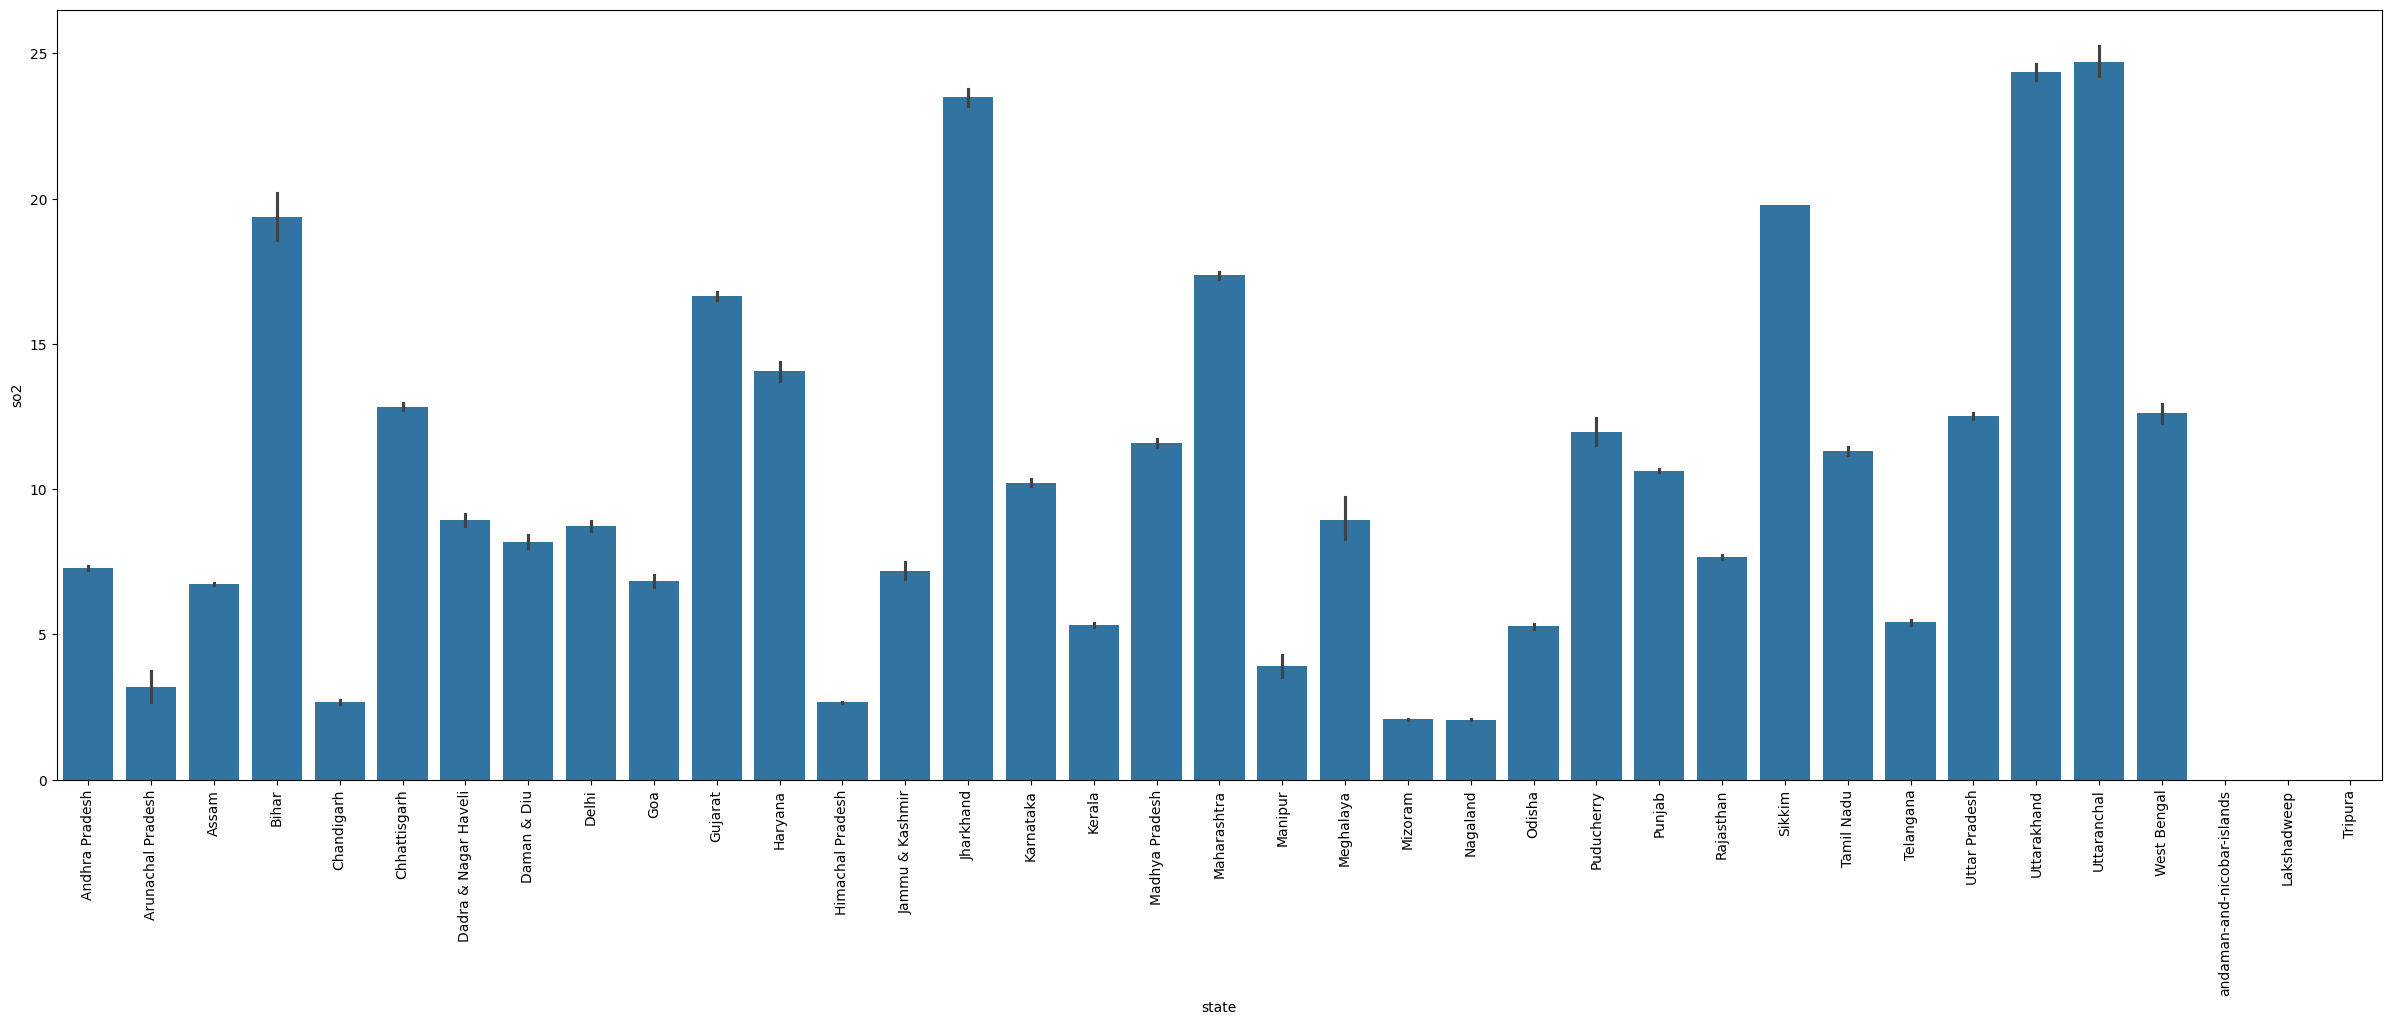

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=df);
# This visualization shows the name of the state having higher so2 levels in the air which is Uttaranchal followed by Uttarakhand

In [ ]:
plt.rcParams['figure.figsize']=(30,10)

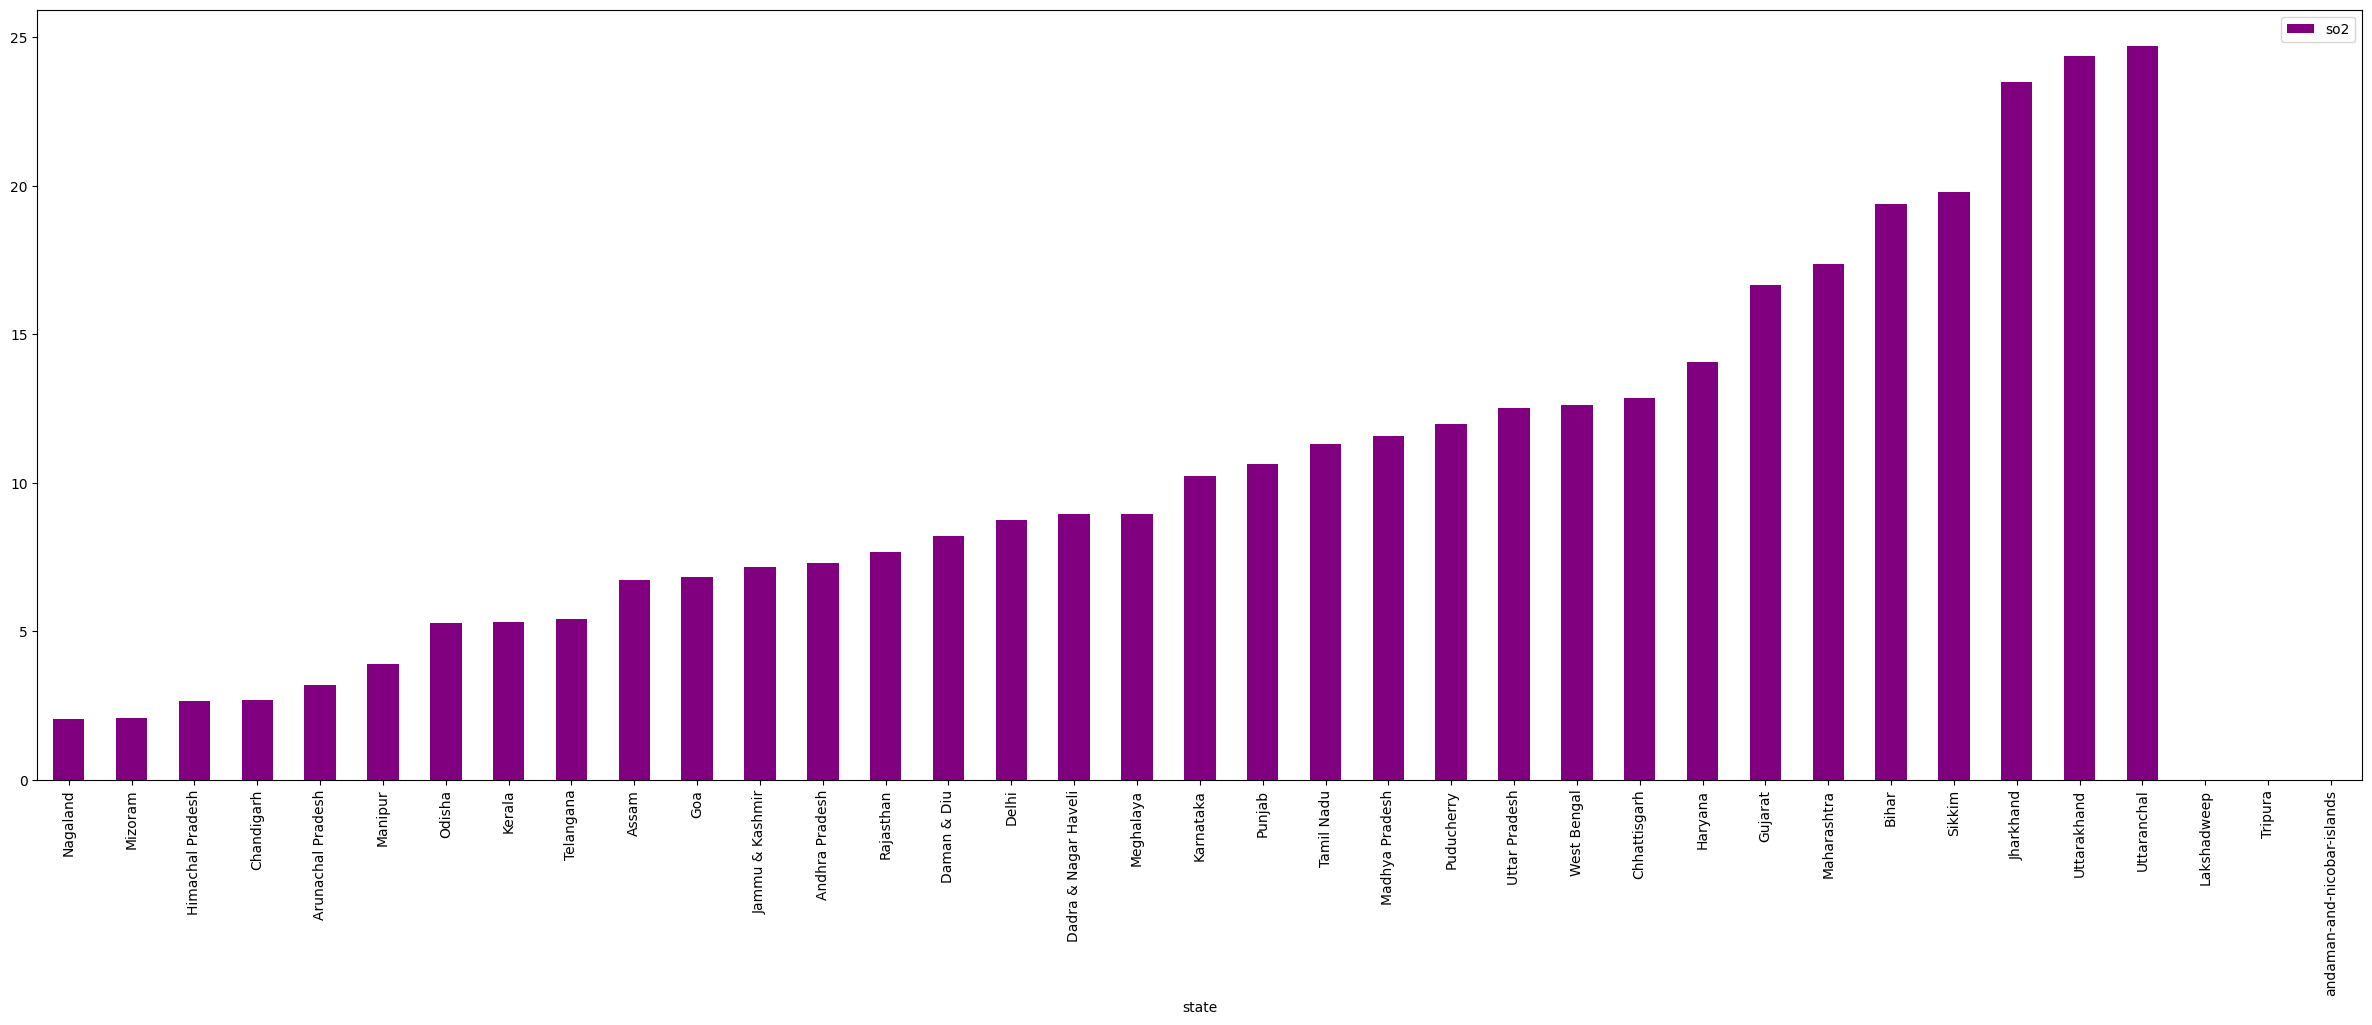

In [ ]:
df[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').plot.bar(color='purple')
plt.show()
# We can also use the groupby function to sort values in an ascending order based on the x-axis, y-axis and its keys
# Below we get a clear picture of the states in an increasing order based on their so2 levels.

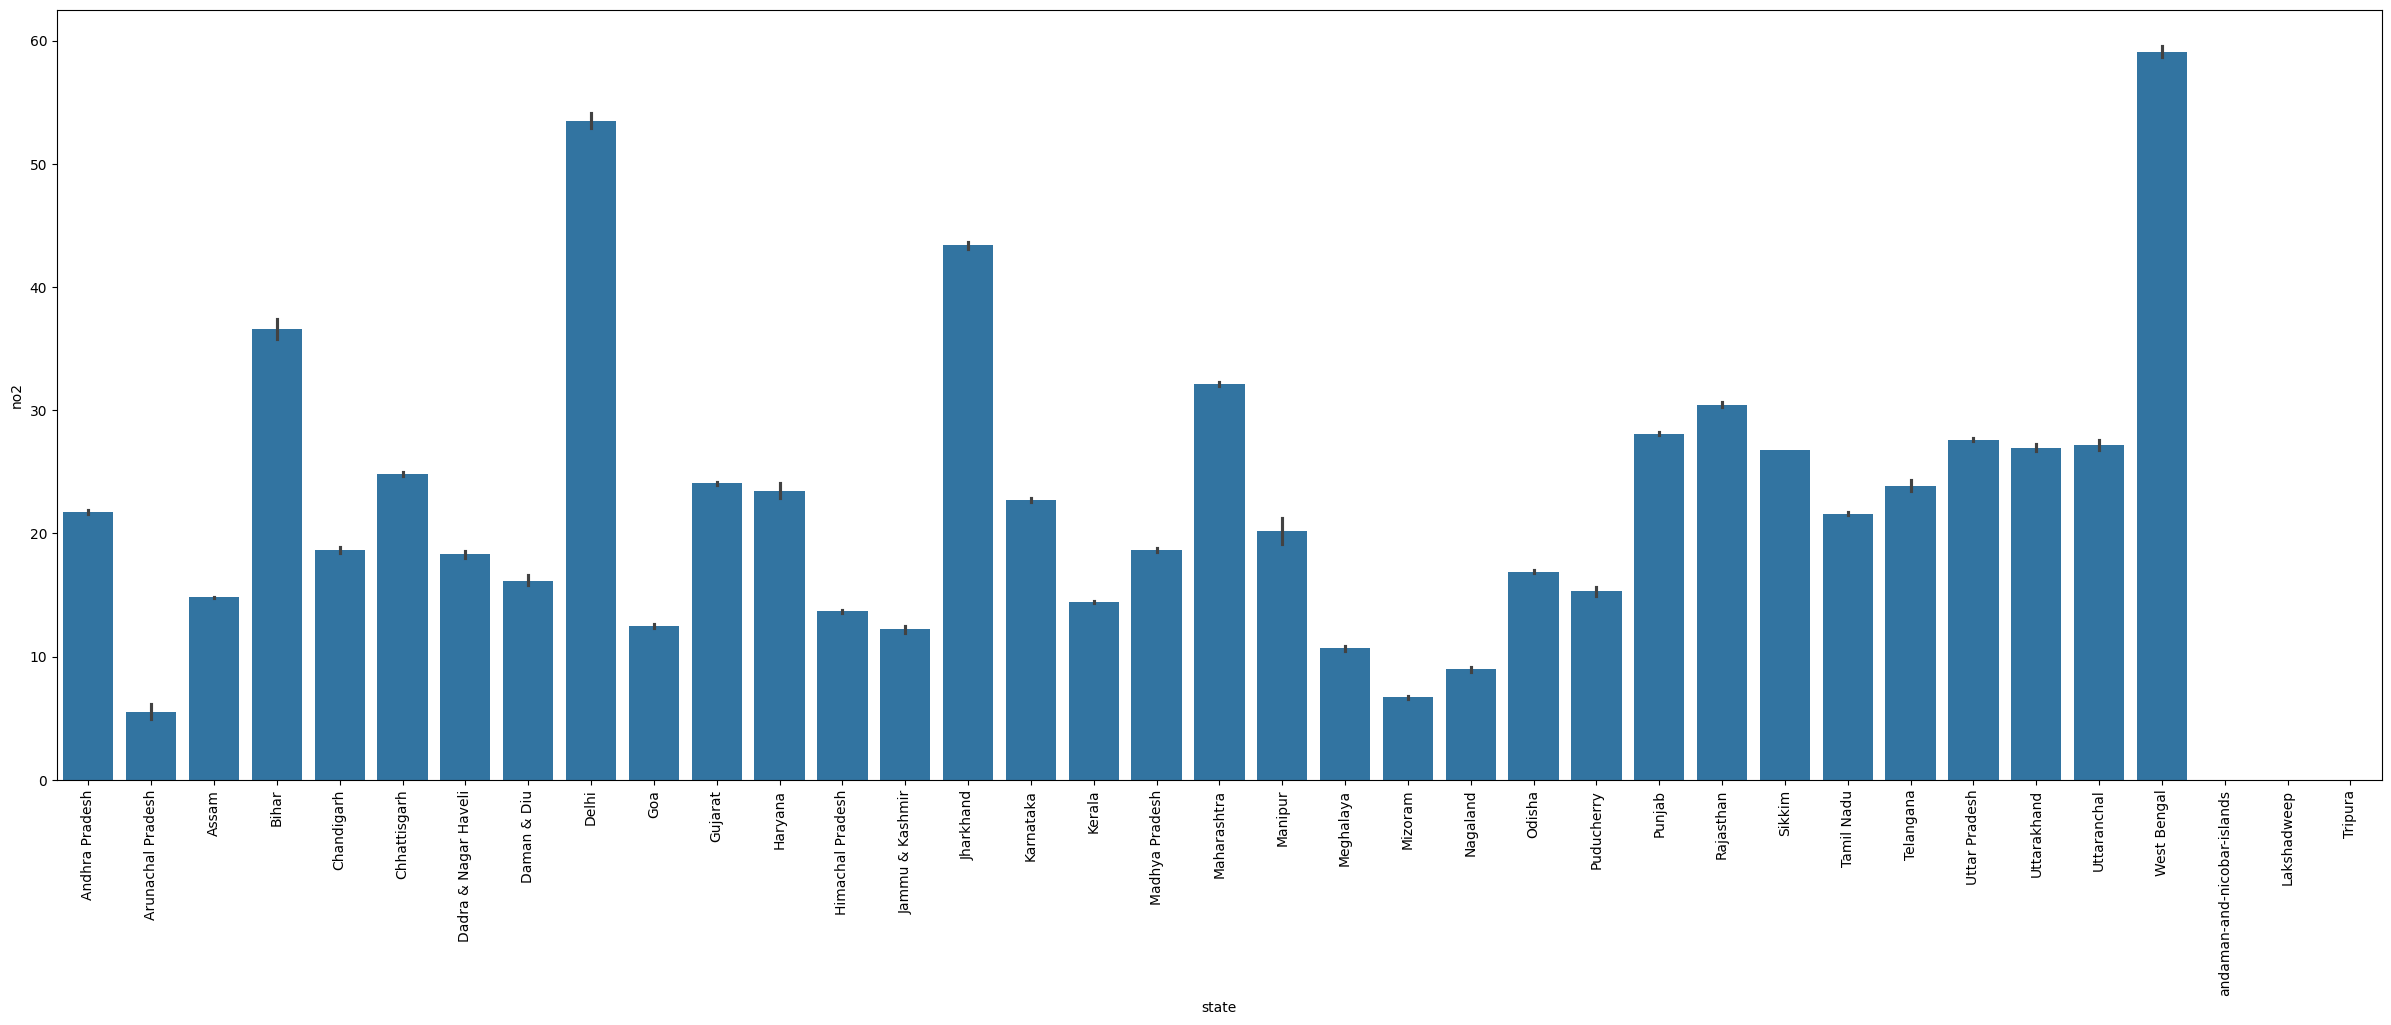

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='no2',data=df);
# West bengal has a higher no2 level compared to other states

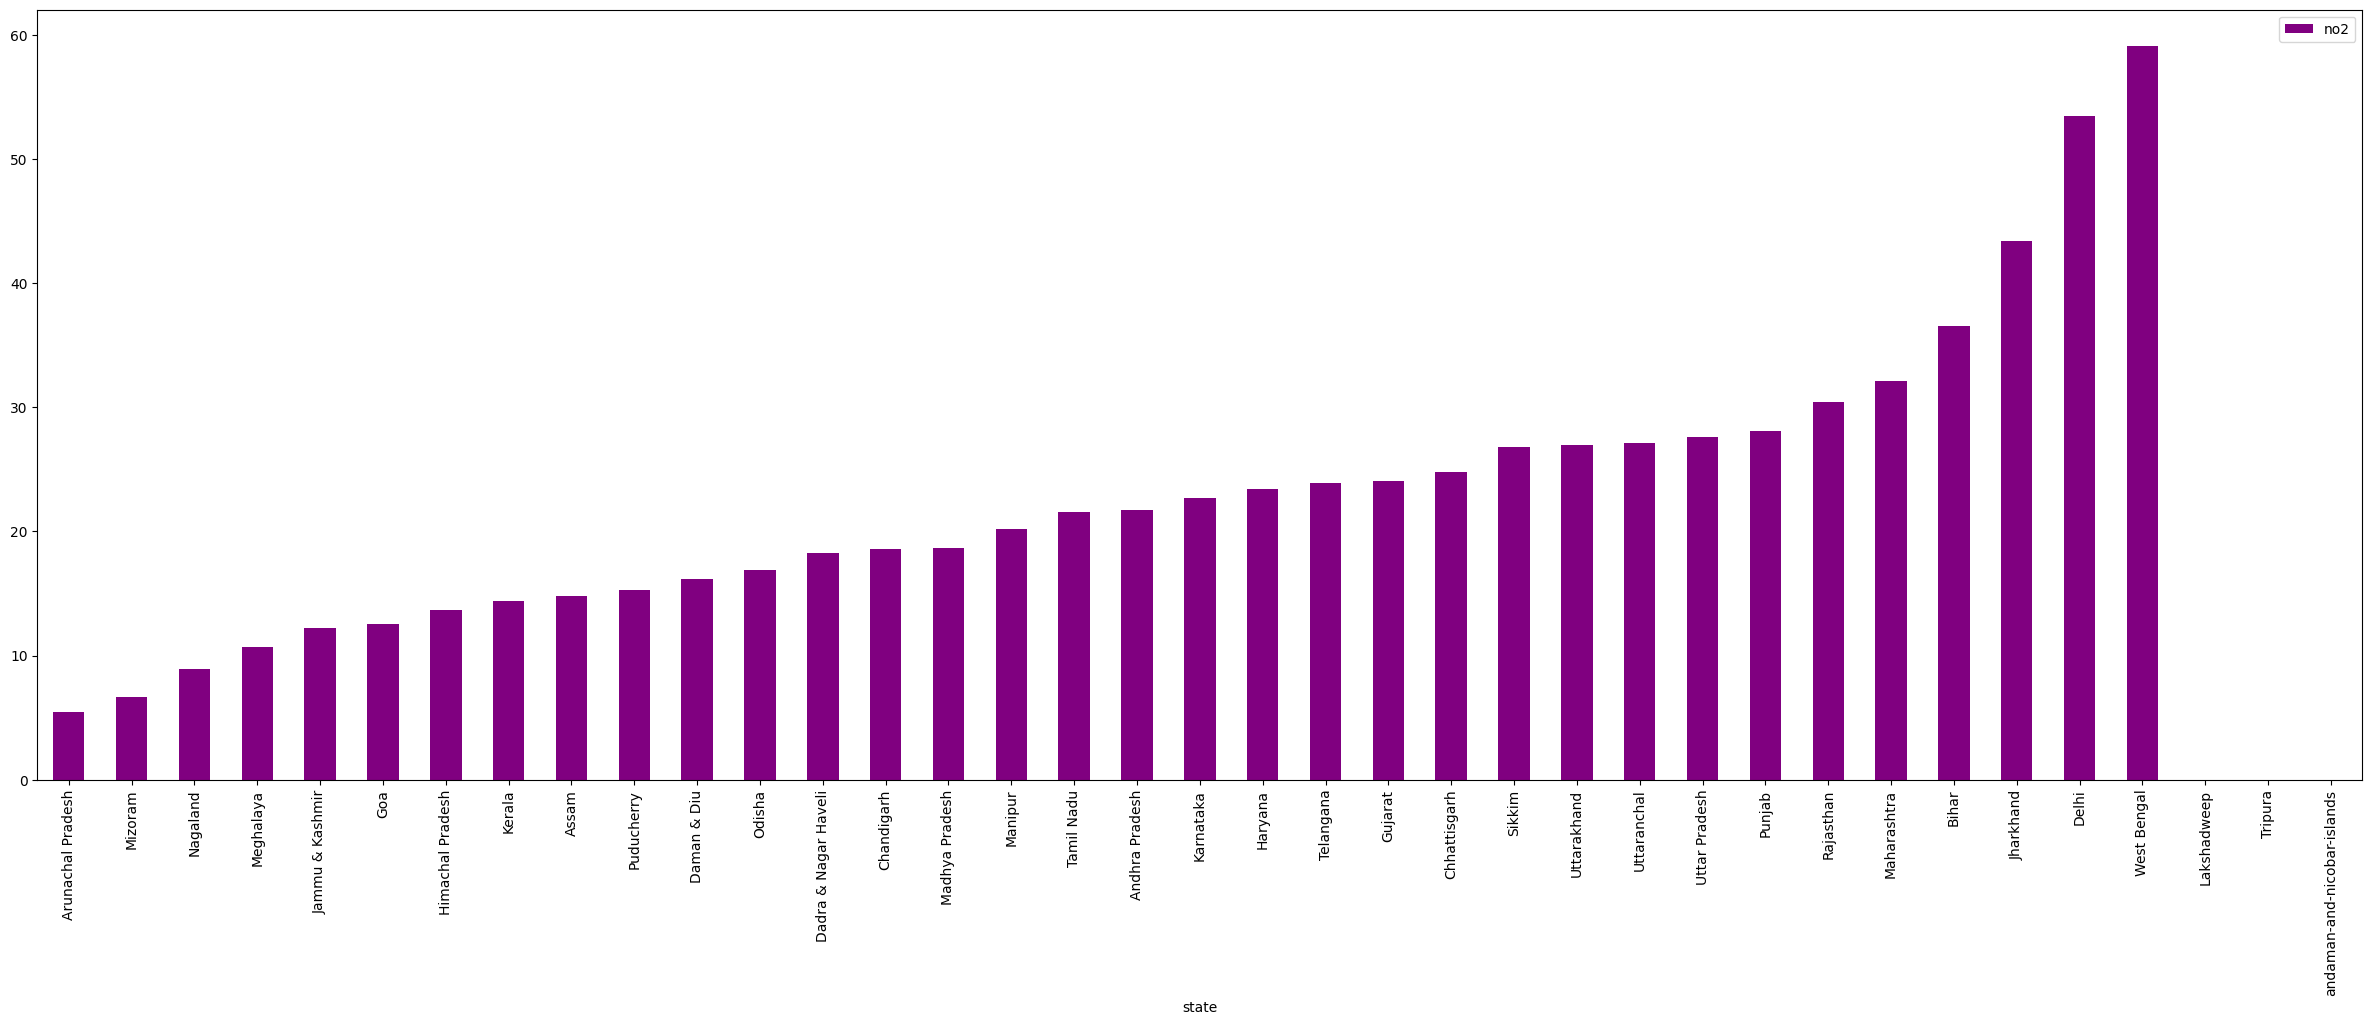

In [ ]:
df[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='purple')
plt.show()
# We can also use the groupby function to sort values in an ascending order based on the x-axis, y-axis and its keys
# Below we get a clear picture of the states in an increasing order based on their no2 levels.

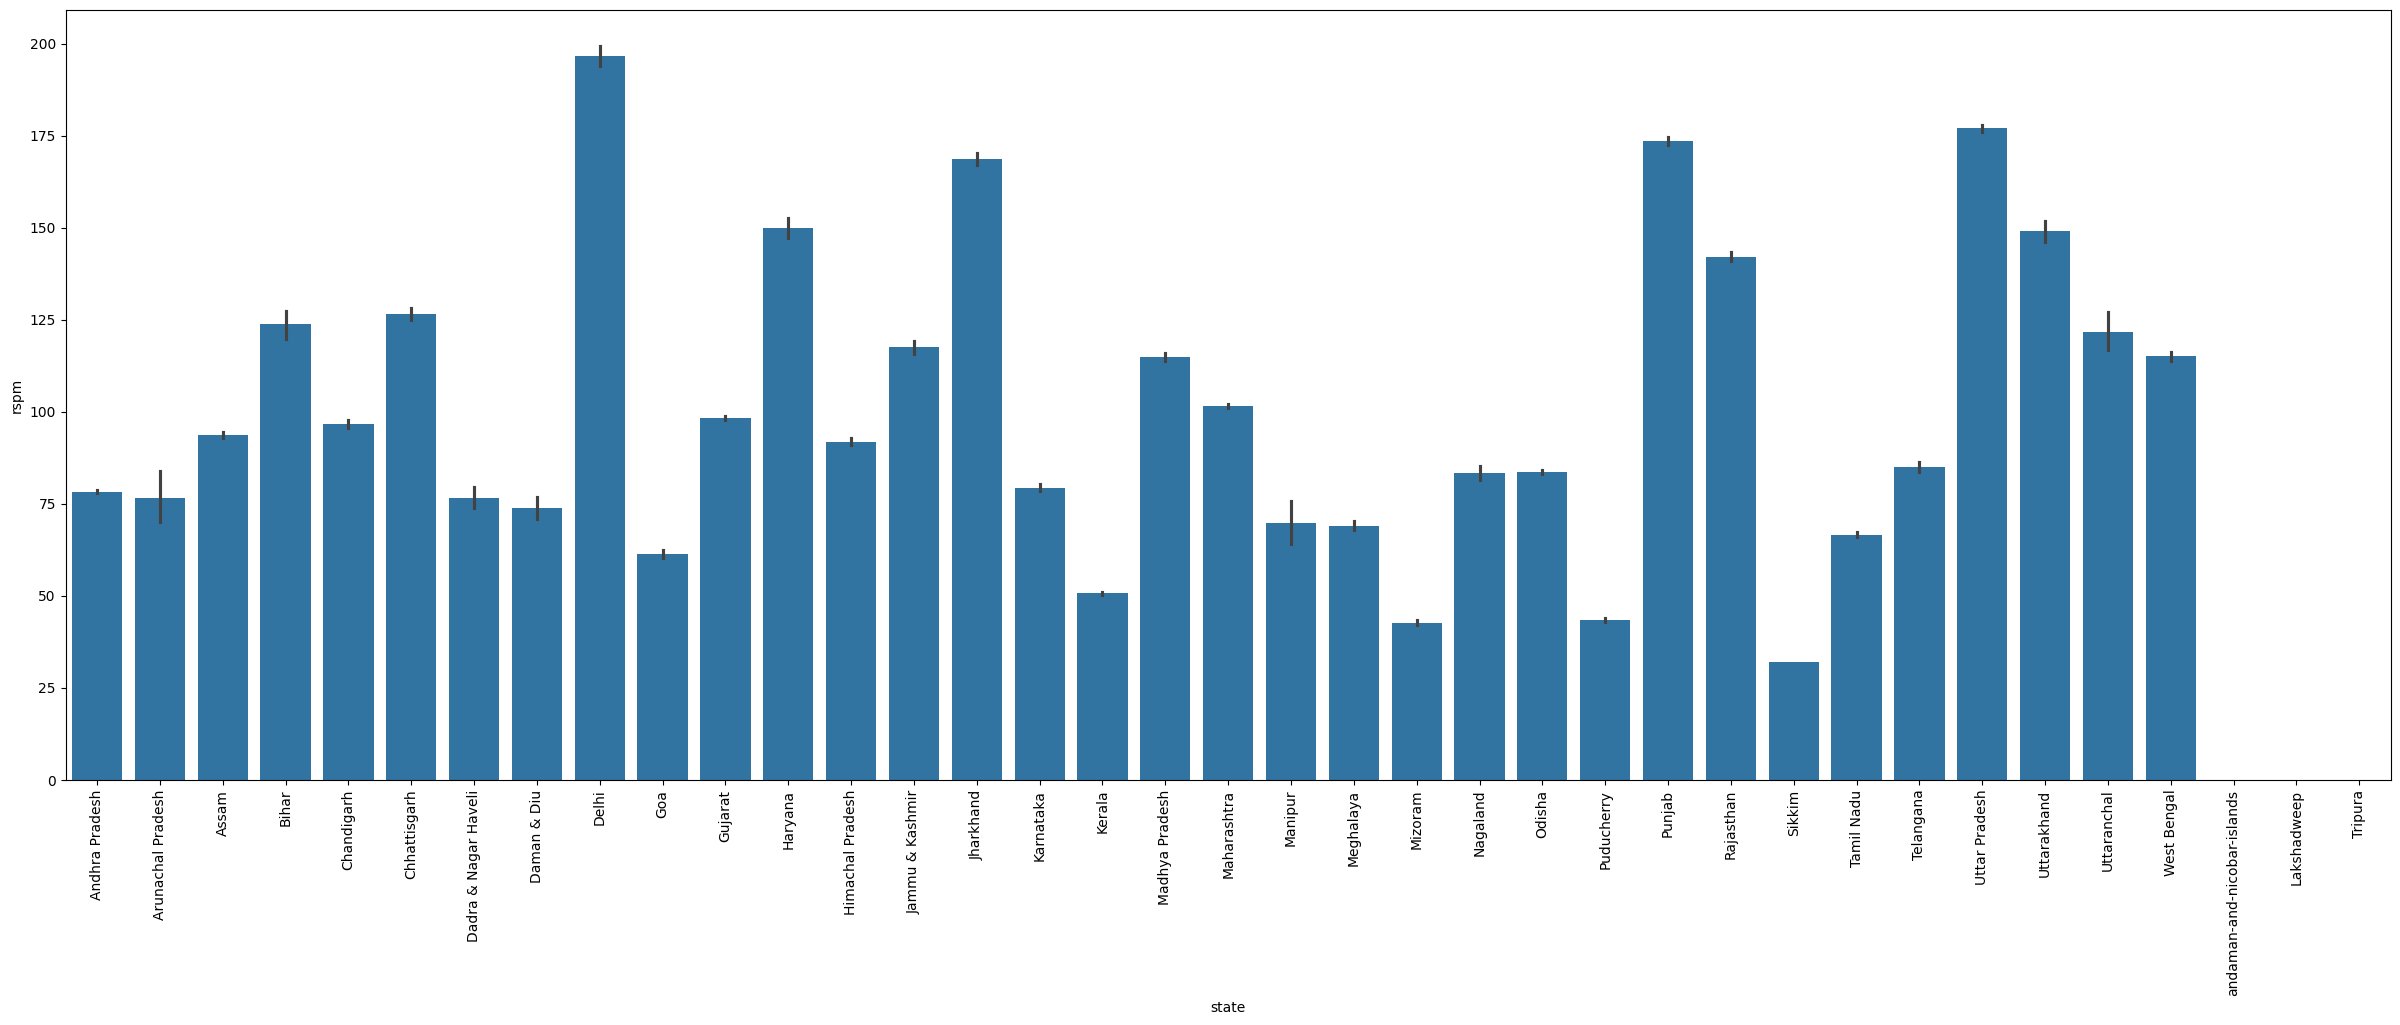

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='rspm',data=df);
# Delhi has higher rspm level compared to other states

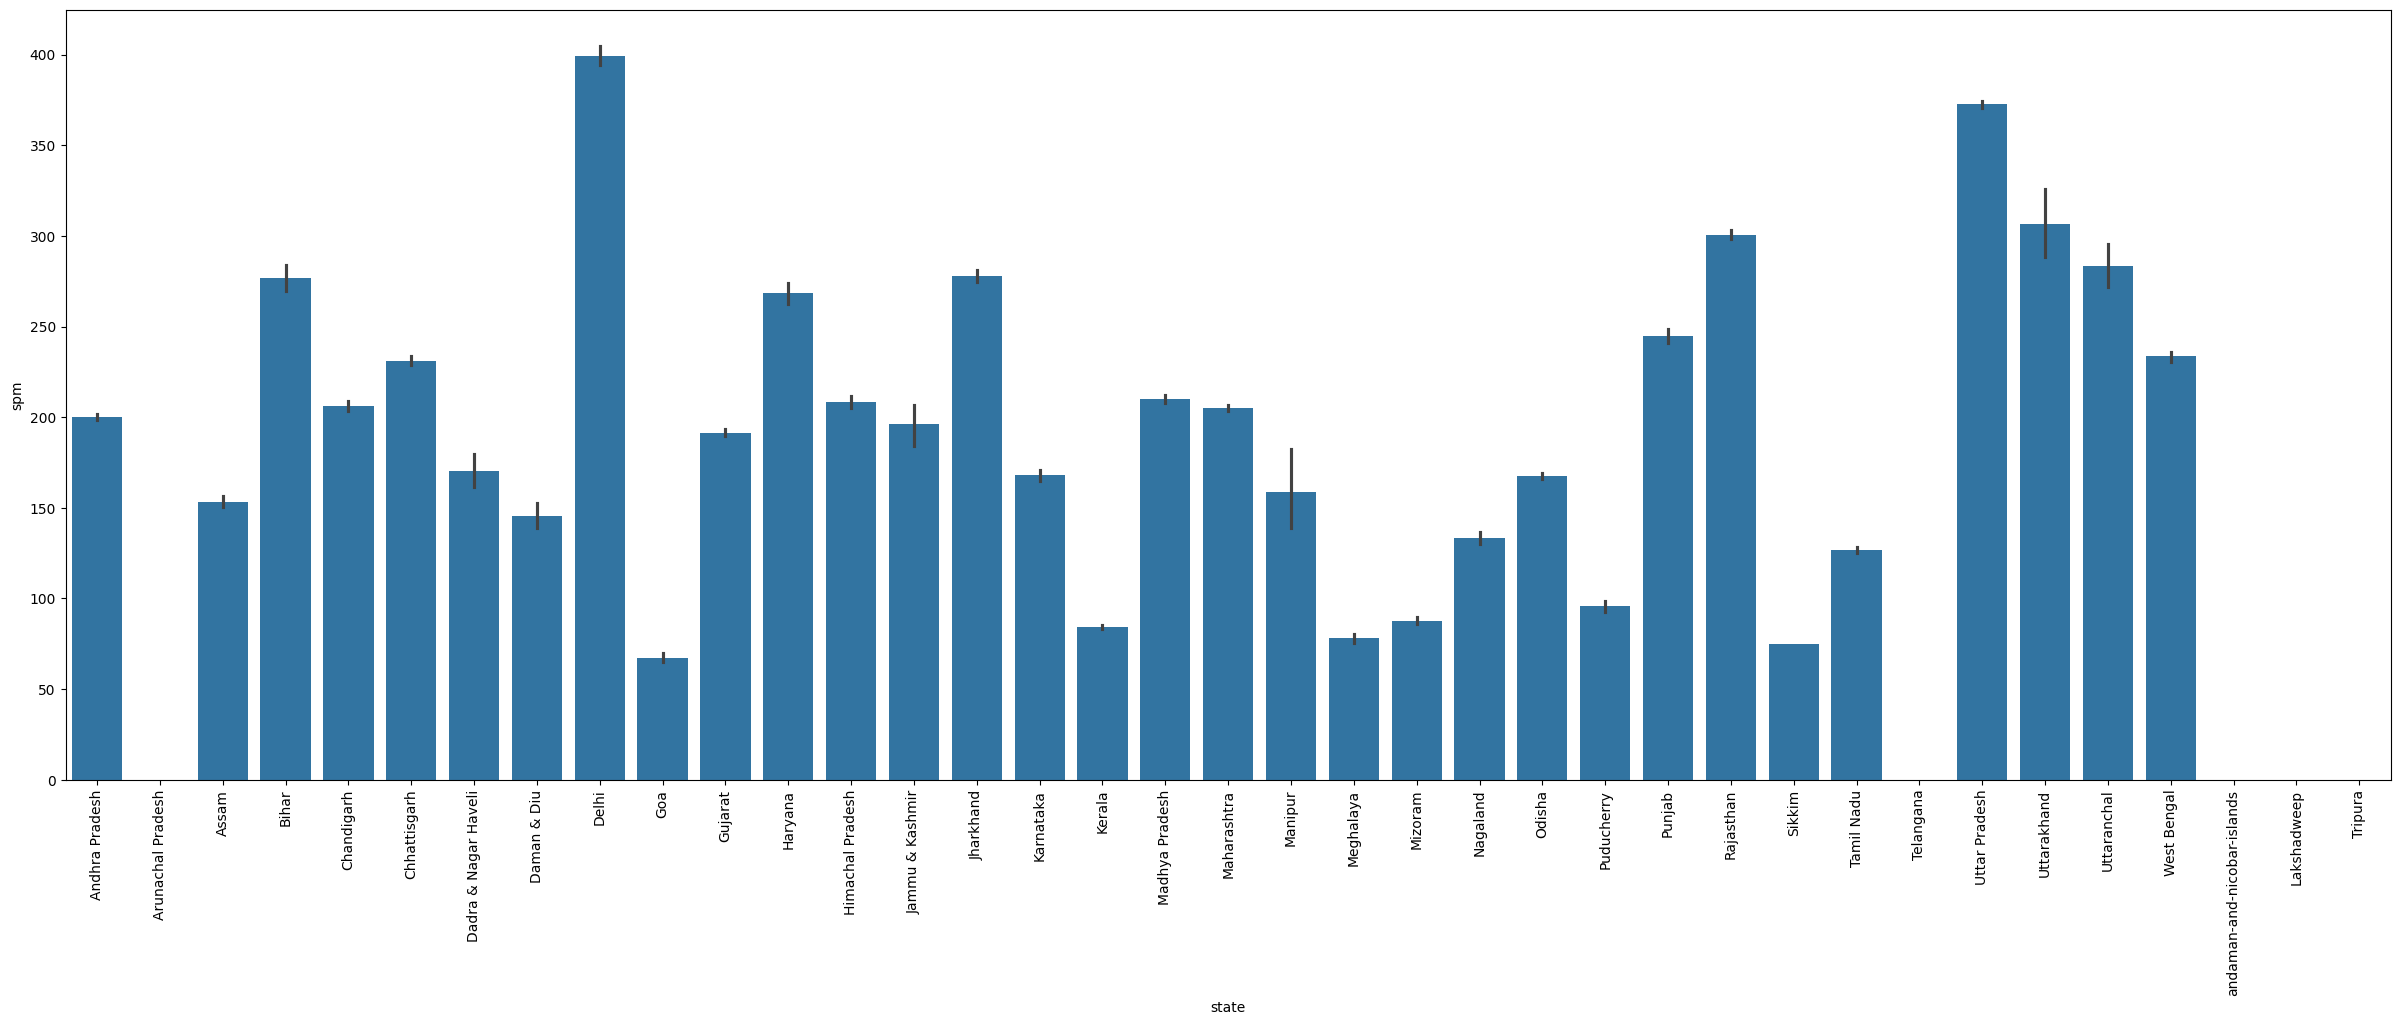

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='spm',data=df);
# Delhi has higher spm level compared to other states

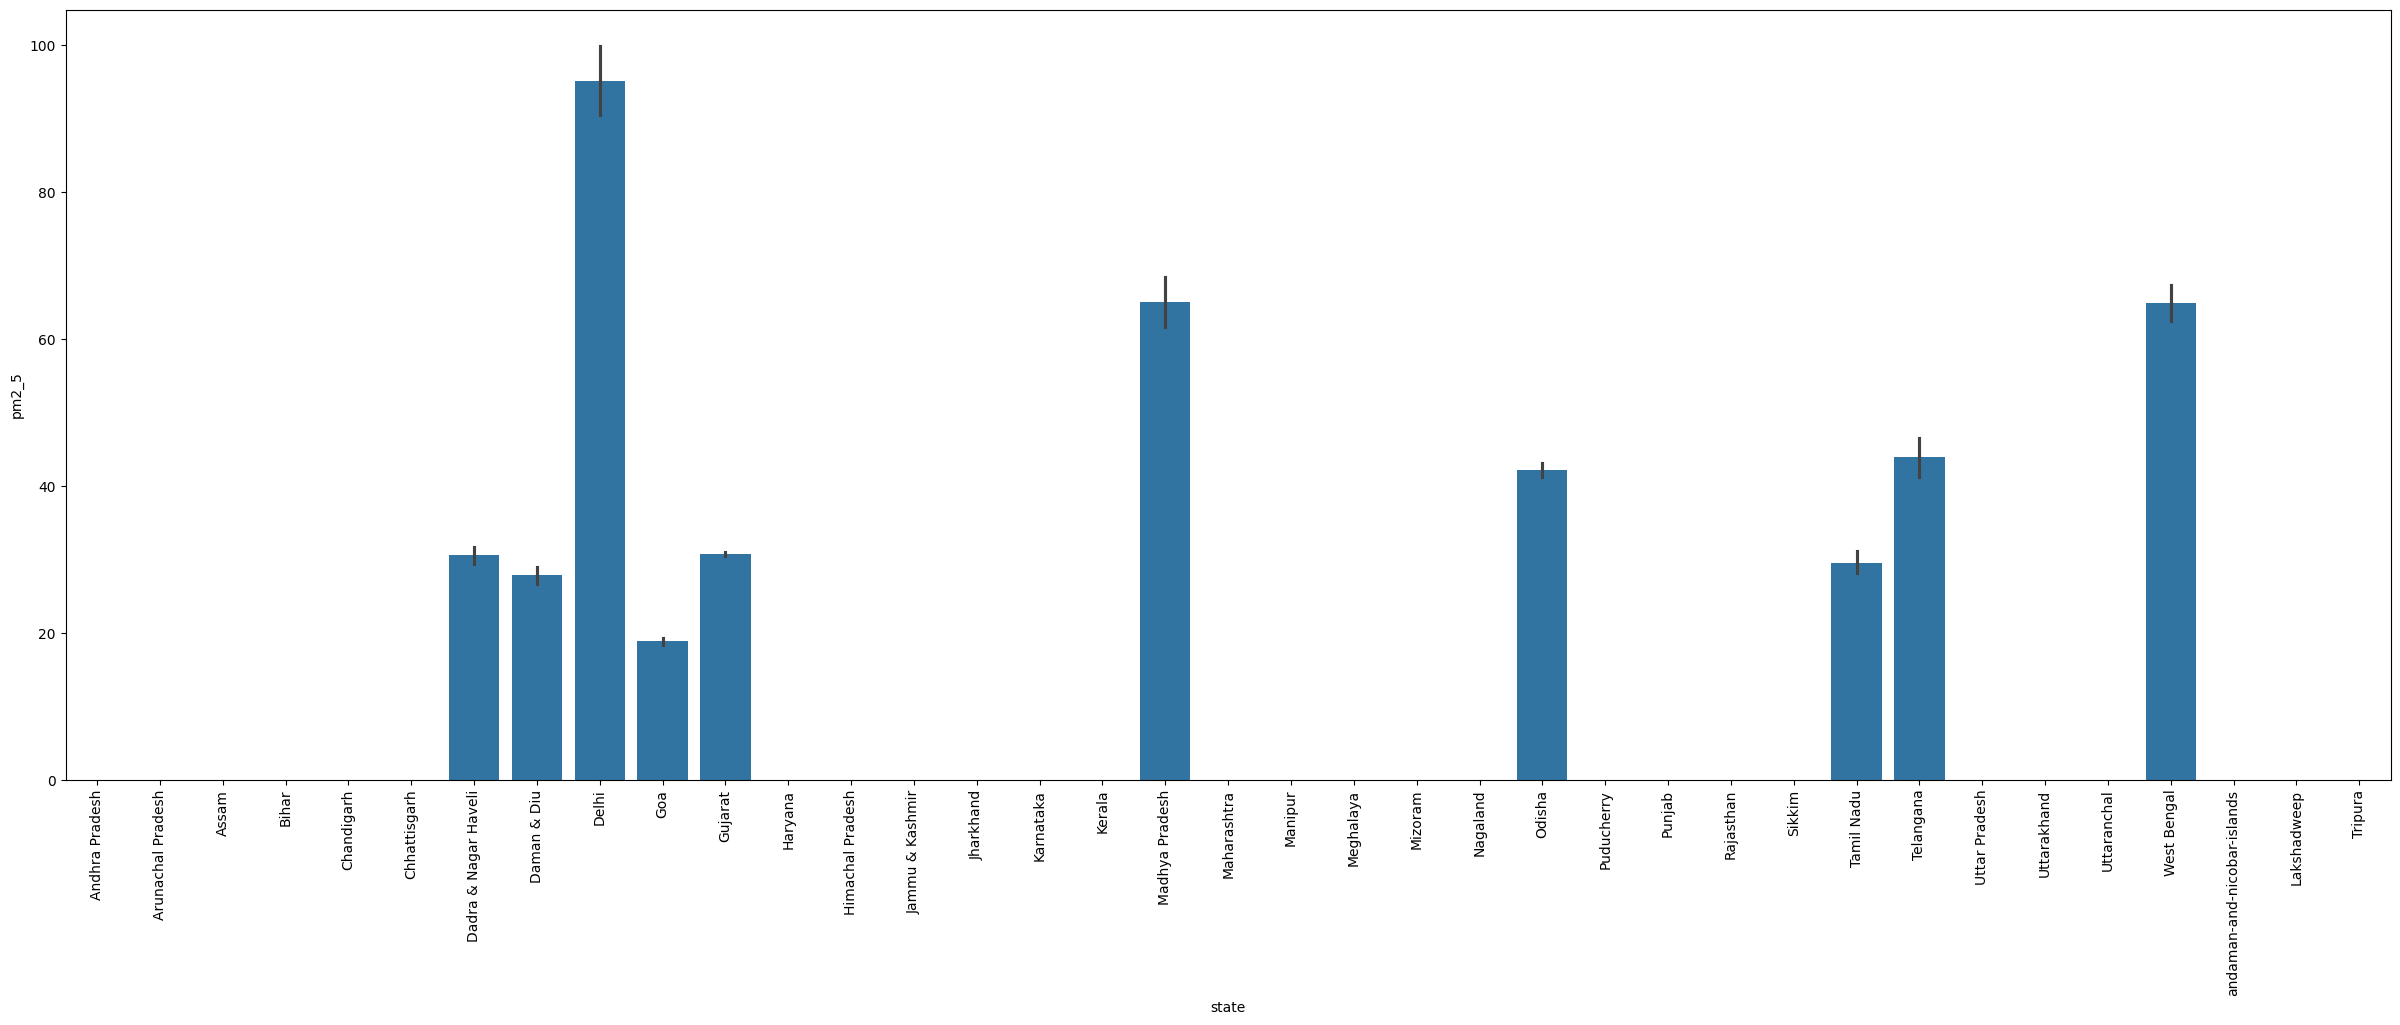

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='pm2_5',data=df);
# Delhi has higher pm2_5 level compared to other states

### Checking all null values and treating those null values.

In [ ]:
nullvalues = df.isnull().sum().sort_values(ascending=False)
# Checking all null values

In [ ]:
nullvalues
# higher null values present in pm2_5 followed by spm

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
sampling_date                       3
location                            3
state                               0
dtype: int64

In [ ]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
#count(returns Non-NAN value)

In [ ]:
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])
# Concatenating total null values and their percentage of missing values for further imputation or column deletion

In [ ]:
missing_data_with_percentage
# As you can see below these are the percentages of null values present in the dataset

,Total,Percent
pm2_5,426428,97.862497
spm,237387,54.478797
agency,149481,34.304933
stn_code,144077,33.064749
rspm,40222,9.230692
so2,34646,7.951035
location_monitoring_station,27491,6.309009
no2,16233,3.725370
type,5393,1.237659
date,7,0.001606


In [ ]:
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)
# Dropping unnecessary columns

In [ ]:
df.isnull().sum()
# Now checking the null values

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
pm2_5       426428
dtype: int64

In [ ]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,NaN,NaN
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,NaN,NaN
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])
# Null value Imputation for categorical data

In [ ]:
df.fillna(0, inplace=True)
# null values are replaced with zeros for the numerical data

In [ ]:
df.isnull().sum()
# Now we have successfully imputed null values which were present in the dataset

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

In [ ]:
df
# The following features are important for our machine learning models.

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,0.0,0.0
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,0.0,0.0
435739,andaman-and-nicobar-islands,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0
435740,Lakshadweep,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0


# CALCULATE AIR QUALITY INDEX FOR SO2 BASED ON FORMULA
The air quality index is a piecewise linear function of the pollutant concentration. At the boundary between AQI categories, there is a discontinuous jump of one AQI unit. To convert from concentration to AQI this equation is used

### Function to calculate so2 individual pollutant index(si)

In [ ]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head()
# calculating the individual pollutant index for so2(sulphur dioxide)

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


### Function to calculate no2 individual pollutant index(ni)

In [ ]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['Noi']=df['no2'].apply(cal_Noi)
data= df[['no2','Noi']]
data.head()
# calculating the individual pollutant index for no2(nitrogen dioxide)

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


### Function to calculate rspm individual pollutant index(rpi)

In [ ]:
def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data= df[['rspm','Rpi']]
data.head()
# calculating the individual pollutant index for rspm(respirable suspended particualte matter concentration)

,rspm,Rpi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


### Function to calculate spm individual pollutant index(spi)

In [ ]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi

df['SPMi']=df['spm'].apply(cal_SPMi)
data= df[['spm','SPMi']]
data.head()
# calculating the individual pollutant index for spm(suspended particulate matter)

,spm,SPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


### function to calculate the air quality index (AQI) of every data value

In [ ]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)
data= df[['state','SOi','Noi','Rpi','SPMi','AQI']]
data.head()
# Caluclating the Air Quality Index.

,state,SOi,Noi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [ ]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.head()
# Using threshold values to classify a particular values as good, moderate, poor, unhealthy, very unhealthy and Hazardous

,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0,0.0,21.750,Good
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0,0.0,8.750,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0,0.0,35.625,Good
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0,0.0,18.375,Good
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0,0.0,9.375,Good


In [ ]:
df['AQI_Range'].value_counts()
# These are the counts of values present in the AQI_Range column.

AQI_Range
Good              219643
Poor               93272
Moderate           56571
Unhealthy          31733
Hazardous          18700
Very unhealthy     15823
Name: count, dtype: int64

### Splitting the dataset into Dependent and Independent columns

In [ ]:
X=df[['SOi','Noi','Rpi','SPMi']]
Y=df['AQI']
X.head()
# we only select columns like soi, noi, rpi, spmi

,SOi,Noi,Rpi,SPMi
0,6.000,21.750,0.0,0.0
1,3.875,8.750,0.0,0.0
2,7.750,35.625,0.0,0.0
3,7.875,18.375,0.0,0.0
4,5.875,9.375,0.0,0.0


In [ ]:
Y.head()
# the AQI column is the target column

0    21.750
1     8.750
2    35.625
3    18.375
4     9.375
Name: AQI, dtype: float64

In [ ]:
df["AQI"].unique()

array([ 21.75      ,   8.75      ,  35.625     , ..., 380.83333333,
       323.33333333, 353.33333333])

In [ ]:
df["AQI"].max()

1086.046511627907

In [ ]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0,0.0,21.750,Good
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0,0.0,8.750,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0,0.0,35.625,Good
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0,0.0,18.375,Good
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0,0.0,9.375,Good


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
# splitting the data into training and testing data

(348593, 4) (87149, 4) (348593,) (87149,)


### Linear Regression

In [ ]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#predicting train
train_pred=model.predict(X_train)
#predicting on test
test_pred=model.predict(X_test)

In [ ]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  13.583424938613533
RMSE TestData =  13.672937344789002
--------------------------------------------------
RSquared value on train: 0.9849533579250526
RSquared value on test: 0.9847286394495923


### Decision Tree Regressor

In [ ]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [ ]:
#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

In [ ]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  2.2616787134647775e-13
RMSE TestData =  1.3026792519945551
--------------------------------------------------
RSquared value on train: 1.0
RSquared value on test: 0.9998613789846276


### Random Forest Regressor

In [ ]:
RF=RandomForestRegressor().fit(X_train,Y_train)

In [ ]:
#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

In [ ]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  0.43170234857448475
RMSE TestData =  1.1588374573249658
--------------------------------------------------
RSquared value on train: 0.9999848018810764
RSquared value on test: 0.9998903018931907


# Classification Algorithms

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X2 = df[['SOi','Noi','Rpi','SPMi']]
Y2 = df['AQI_Range']
# Splitting the data into independent and dependent columns for classification

In [ ]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.33, random_state=70)
# Splitting the data into training and testing data

### Logistic Regression

In [ ]:
#fit the model on train data
log_reg = LogisticRegression().fit(X_train2, Y_train2)

#predict on train
train_preds2 = log_reg.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds2))

#predict on test
test_preds2 = log_reg.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds2))
print('-'*50)

# Kappa Score.
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds2))

Model accuracy on train is:  0.7276012426913104
Model accuracy on test is:  0.7271254216071491
--------------------------------------------------
KappaScore is:  0.584377382981496


In [ ]:
log_reg.predict([[727,327.55,78.2,100]])

array(['Good'], dtype=object)

In [ ]:
log_reg.predict([[2.7,45,35.16,23]])

array(['Poor'], dtype=object)

In [ ]:
log_reg.predict([[10,2.8,82,20]])

array(['Good'], dtype=object)

In [ ]:
log_reg.predict([[2,45.8,37,32]])

array(['Poor'], dtype=object)

### Decision Tree Classifier

In [ ]:
#fit the model on train data
DT2 = DecisionTreeClassifier().fit(X_train2,Y_train2)

#predict on train
train_preds3 = DT2.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds3))

#predict on test
test_preds3 = DT2.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds3))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds3))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9998052783476477
--------------------------------------------------
KappaScore is:  0.9997111966529943


### Random Forest Classifier

In [ ]:
#fit the model on train data
RF=RandomForestClassifier().fit(X_train2,Y_train2)
#predict on train
train_preds4 = RF.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds4))

#predict on test
test_preds4 = RF.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds4))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds4))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9998400500712821
--------------------------------------------------
KappaScore is:  0.9997627707767762


### K-Nearest Neighbours

In [ ]:
#fit the model on train data
KNN = KNeighborsClassifier().fit(X_train2,Y_train2)
#predict on train
train_preds5 = KNN.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds5))

#predict on test
test_preds5 = KNN.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds5))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds5))

Model accuracy on train is:  0.9981640503242026
Model accuracy on test is:  0.9967105949441913
--------------------------------------------------
KappaScore is:  0.9951204869122668


##SupportVectorMachine(SVM)-MODEL

In [ ]:
# from sklearn.svm import SVR
# from sklearn import metrics
# import numpy as np

# # Initialize the model
# svm_reg = SVR()

# # Fit the model
# svm_reg.fit(X_train, Y_train)

# # Predicting on training and test data
# train_preds_svm = svm_reg.predict(X_train)
# test_preds_svm = svm_reg.predict(X_test)

# # Calculating RMSE
# RMSE_train_svm = np.sqrt(metrics.mean_squared_error(Y_train, train_preds_svm))
# RMSE_test_svm = np.sqrt(metrics.mean_squared_error(Y_test, test_preds_svm))

# print("RMSE Training Data SVM = ", str(RMSE_train_svm))
# print("RMSE Test Data SVM = ", str(RMSE_test_svm))
# print('-'*50)
# print('RSquared value on train SVM:', svm_reg.score(X_train, Y_train))
# print('RSquared value on test SVM:', svm_reg.score(X_test, Y_test))


#LSTM-MODEL

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming X_train, Y_train, X_test, Y_test are already defined and are in sequence form
# Normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshaping input to be [samples, time steps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit model
model.fit(X_train_reshaped, Y_train, epochs=50, batch_size=72, validation_data=(X_test_reshaped, Y_test), verbose=2, shuffle=False)

# Predicting
train_preds_lstm = model.predict(X_train_reshaped)
test_preds_lstm = model.predict(X_test_reshaped)

# Calculating RMSE
RMSE_train_lstm = np.sqrt(mean_squared_error(Y_train, train_preds_lstm))
RMSE_test_lstm = np.sqrt(mean_squared_error(Y_test, test_preds_lstm))
R2_train_lstm = r2_score(Y_train, train_preds_lstm)
R2_test_lstm = r2_score(Y_test, test_preds_lstm)

print("RMSE Training Data LSTM = ", str(RMSE_train_lstm))
print("RMSE Test Data LSTM = ", str(RMSE_test_lstm))
print("R2 Training Data LSTM = ", R2_train_lstm)
print("R2 Test Data LSTM = ", R2_test_lstm)


Epoch 1/50
4842/4842 - 22s - loss: 11330.4893 - val_loss: 4227.7896 - 22s/epoch - 5ms/step
Epoch 2/50
4842/4842 - 19s - loss: 2160.1641 - val_loss: 789.6118 - 19s/epoch - 4ms/step
Epoch 3/50
4842/4842 - 19s - loss: 356.1984 - val_loss: 140.7581 - 19s/epoch - 4ms/step
Epoch 4/50
4842/4842 - 18s - loss: 100.3347 - val_loss: 76.7200 - 18s/epoch - 4ms/step
Epoch 5/50
4842/4842 - 19s - loss: 66.9507 - val_loss: 56.0047 - 19s/epoch - 4ms/step
Epoch 6/50
4842/4842 - 18s - loss: 49.9268 - val_loss: 42.6961 - 18s/epoch - 4ms/step
Epoch 7/50
4842/4842 - 18s - loss: 39.1299 - val_loss: 33.5675 - 18s/epoch - 4ms/step
Epoch 8/50
4842/4842 - 18s - loss: 31.0179 - val_loss: 26.7786 - 18s/epoch - 4ms/step
Epoch 9/50
4842/4842 - 18s - loss: 25.2656 - val_loss: 22.2682 - 18s/epoch - 4ms/step
Epoch 10/50
4842/4842 - 19s - loss: 21.0888 - val_loss: 18.8343 - 19s/epoch - 4ms/step
Epoch 11/50
4842/4842 - 18s - loss: 17.9331 - val_loss: 16.3561 - 18s/epoch - 4ms/step
Epoch 12/50
4842/4842 - 18s - loss: 15.67

##Consistency between Training and Testing
The close RMSE values for training (2.331) and testing (2.349) suggest that the model is not overfitting, which is a positive sign. It indicates that the model generalizes well on unseen data.

In [ ]:
model.save('AQI_LSTM.h5')
from google.colab import files
files.download('AQI_LSTM.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import numpy as np
# from keras.models import load_model

# # Assuming your model path is '/content/air_quality_model.h5'
# model_path = '/content/drive/MyDrive/Colab Notebooks/aqi files/AQI_LSTM.h5'
# model = load_model(model_path)

# # Function to preprocess input and predict label
# def predict_air_quality(input_data):
#     # Convert input data to numpy array
#     input_data_array = np.array(input_data, dtype=np.float32)

#     # Reshape input data to match the model's input shape
#     input_data_reshaped = input_data_array.reshape((input_data_array.shape[0], 1, input_data_array.shape[1]))

#     # Call model.predict with the preprocessed input data
#     prediction = model.predict(input_data_reshaped)

#     return prediction

# # Define threshold values for different categories
# thresholds = {
#     "Good": 400,
#     "Moderate": 500,
#     "Unhealthy": 700,
#     "Hazardous": 900,
#     "Very Unhealthy": np.inf  # Set a large value for the highest category
# }

# # Function to convert numerical prediction to text label
# def get_air_quality_label(value, thresholds):
#     for label, threshold in thresholds.items():
#         if value <= threshold:
#             return label

# # Sample input data (for testing, you might want to use various inputs)
# sample_inputs = [[1, 2, 3, 4], [10, 20, 30, 40], [1000, 2000, 3000, 4000]]

# for input_data in sample_inputs:
#     prediction = predict_air_quality([input_data])
#     predicted_label = get_air_quality_label(prediction[0][0], thresholds)
#     print(f"Input: {input_data} -> Predicted Air Quality Label: {predicted_label}")


In [ ]:
# import numpy as np

# # Sample input data
# input_data = [[1,2,3,4]]

# # Convert input data to numpy array
# input_data_array = np.array(input_data, dtype=np.float32)

# # Reshape input data to match the model's input shape
# input_data_reshaped = input_data_array.reshape((input_data_array.shape[0], 1, input_data_array.shape[1]))

# # Call model.predict with the preprocessed input data
# prediction = model.predict(input_data_reshaped)

# # Define threshold values for different categories
# thresholds = {
#     "Good": 50,
#     "Moderate": 900,
#     "Unhealthy": 150,
#     "Hazardous": 200,
#     "Very Unhealthy": np.inf  # Set a large value for the highest category
# }

# # Function to convert numerical prediction to text label
# def get_air_quality_label(value, thresholds):
#     for label, threshold in thresholds.items():
#         if value <= threshold:
#             return label

# # Convert numerical prediction to text label
# predicted_label = get_air_quality_label(prediction[0][0], thresholds)

# print("Predicted Air Quality Label:", predicted_label)


1/1 [==============================] - 0s 17ms/step
Predicted Air Quality Label: Moderate


In [ ]:
# import numpy as np

# # Sample input data
# input_data = [[6.000,21.750,0.0,0.0]]

# # Convert input data to numpy array
# input_data_array = np.array(input_data, dtype=np.float32)

# # Reshape input data to match the model's input shape
# input_data_reshaped = input_data_array.reshape((input_data_array.shape[0], 1, input_data_array.shape[1]))

# # Call model.predict with the preprocessed input data
# prediction = model.predict(input_data_reshaped)

# print(prediction)


1/1 [==============================] - 0s 19ms/step
[[510.28644]]


In [ ]:
# KNN.predict([[1,1.2,3.12,0]])
# # Predictions on random values

array(['Good'], dtype=object)

In [ ]:
# KNN.predict([[325.7,345,798.182,203]])
# # Predictions on random values

array(['Unhealthy'], dtype=object)

## WEB INTERFACE FOR THE PREDICTION

In [ ]:
pip install gradio

In [ ]:
import gradio as gr

def predict_Quality(SOi,Noi,Rpi,SPMi):
    KNN = KNeighborsClassifier()
    KNN.fit(X_train2,Y_train2)
    pred=KNN.predict([[SOi,Noi,Rpi,SPMi]])
    return pred
demo=gr.Interface(fn=predict_Quality,title="AIR QUALITY PREDICTION",
                  description=''' Mitigating air quality issues, including improving Air Quality Index (AQI) levels, requires a multi-faceted approach involving various strategies at different levels, including policy, technology, and individual actions. Here are some common strategies:

Regulatory Policies: Governments can implement and enforce regulations to limit emissions from industrial facilities, power plants, vehicles, and other sources. This can include setting emissions standards, implementing emissions trading programs, and enforcing pollution controls.

Transition to Clean Energy: Promoting the use of renewable energy sources such as solar, wind, and hydropower can reduce reliance on fossil fuels and decrease air pollution associated with energy production. Incentives for renewable energy development and phasing out subsidies for fossil fuels can accelerate this transition.

Vehicle Emissions Control: Implementing vehicle emissions standards, promoting the use of electric vehicles (EVs), improving public transportation systems, and incentivizing carpooling and ridesharing can reduce emissions from transportation, a significant contributor to air pollution.

Industrial Emission Controls: Encouraging industries to adopt cleaner production processes, invest in pollution control technologies, and reduce emissions of harmful pollutants such as sulfur dioxide (SO2), nitrogen oxides (NOx), volatile organic compounds (VOCs), and particulate matter (PM) can improve air quality.

Urban Planning and Green Infrastructure: Designing cities with a focus on walkability, bikeability, and public transit accessibility can reduce the need for private vehicle use and associated emissions. Increasing green spaces, such as parks and urban forests, can also help absorb pollutants and improve air quality.

Indoor Air Quality Improvement: Implementing measures to improve indoor air quality in homes, schools, and workplaces can reduce exposure to pollutants such as volatile organic compounds (VOCs), radon, mold, and particulate matter. This can include proper ventilation, air filtration systems, and avoiding the use of harmful chemicals indoors.

Public Awareness and Education: Raising awareness about the health effects of air pollution and promoting behavior changes such as reducing energy consumption, conserving resources, and adopting sustainable practices can empower individuals to contribute to air quality improvement efforts.

International Cooperation: Addressing transboundary air pollution requires collaboration between countries to develop and implement regional and global agreements, share best practices, and coordinate efforts to reduce emissions of pollutants that contribute to air quality degradation.

Research and Innovation: Investing in research and development of new technologies, monitoring systems, and pollution control methods can advance our understanding of air quality issues and identify innovative solutions to address them effectively.

Community Engagement: Engaging local communities in air quality monitoring, reporting, and decision-making processes can foster a sense of ownership and responsibility for maintaining clean air and encourage grassroots initiatives to address local air quality challenges. ''',


                  inputs=[gr.Slider(minimum=0.1, maximum=1000),
        gr.Slider(minimum=0.1, maximum=1000),
        gr.Slider(minimum=0.1, maximum=1000),
        gr.Slider(minimum=0.1, maximum=1000)],outputs="text")
demo.launch(debug=True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://c3b35d8388b42ac122.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://c3b35d8388b42ac122.gradio.live


In [ ]:
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model

# Load the LSTM model
model = load_model("/content/AQI_LSTM.h5")

def predict_air_quality(SOi, Noi, Rpi, SPMi):
    # Prepare the input data for the LSTM model
    input_data = np.array([[SOi, Noi, Rpi, SPMi]])
    input_data = input_data.reshape((input_data.shape[0], 1, input_data.shape[1]))

    # Perform prediction using the loaded LSTM model
    prediction = model.predict(input_data)

    return prediction[0][0]  # Assuming your LSTM model outputs a single scalar value

# Define the Gradio interface
demo = gr.Interface(
    fn=predict_air_quality,
    title="AIR QUALITY PREDICTION (LSTM)",
    description="Predict air quality using an LSTM model.",
    inputs=[
        gr.Slider(minimum=0.1, maximum=1000, label="SOi"),
        gr.Slider(minimum=0.1, maximum=1000, label="Noi"),
        gr.Slider(minimum=0.1, maximum=1000, label="Rpi"),
        gr.Slider(minimum=0.1, maximum=1000, label="SPMi"),
    ],
    outputs="text"
)

# Launch the Gradio interface
demo.launch(debug=True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://ad50da7b049f0272fe.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 1s 732ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://ad50da7b049f0272fe.gradio.live
